# 규제 선형 모델

- 비용 함수는 학습 뎅이터의 잔차 오류값을 최소로 하는 RSS 최소화 방법과 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이루어야 함
> 비용함수=Min(RSS(W)+alpha*|W|)
>> 여기서 alpha: 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터
>> alpha 값을 크게 하면 비용함수는 회귀 계수 W값을 작게해서 상쇄 가능
- 규제: 비용 함수에 alpha 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식

> L1 규제: Lasso 회귀: W의 제곱에 대해 패널티를 부여

> L2 규제: Ridge 회귀: W의 절댓값에 대해 패널티를 부여

## 선형 회귀 모델을 위한 데이터 변환

- feature와 target값의 분포가 정규분포 형태를 매우 선호
- 데이터 세트에 스케일링/정규화 방법 수행하기
> target의 경우에는 로그 변환 적용

# 로지스틱 회귀

- 선형회귀방식을 분류에 적용한 알고리즘
- 선형 회귀계열임


In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston=load_boston()
bostonDF=pd.DataFrame(boston.data,columns=boston.feature_names)
bostonDF['PRICE']=boston.target
bostonDF.head()
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)

C:\Users\MYCOM\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

## Ridge 회귀

In [2]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np
# alpha=10으로 설정해 Ridge 회귀 수행
ridge=Ridge(alpha=10)
neg_mse_scores=cross_val_score(ridge,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)
print('5 folds의 개별 Negative MSE scores',np.round(neg_mse_scores,3))
print('5 folds의 개별 RMSE scores',np.round(rmse_scores,3))
print('5 folds의 평균 RMSE {0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE 5.518


In [3]:
# alpha 값을 변화시키면서 RMSE와 회귀 계수값 변화 확인
# Ridge에 사용될 alpha 파라미터의 값을 정의
alphas=[0,0.1,1,10,100]
# alpha list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    # cross_val_score를 이용해 fold의 평균 rmse 를 계산
    neg_mse_scores=cross_val_score(ridge,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
    avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0}일 때 5 folds 평군 RMSE {1:.3f}'.format(alpha,avg_rmse))

alpha 0일 때 5 folds 평군 RMSE 5.829
alpha 0.1일 때 5 folds 평군 RMSE 5.788
alpha 1일 때 5 folds 평군 RMSE 5.653
alpha 10일 때 5 folds 평군 RMSE 5.518
alpha 100일 때 5 folds 평군 RMSE 5.330


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

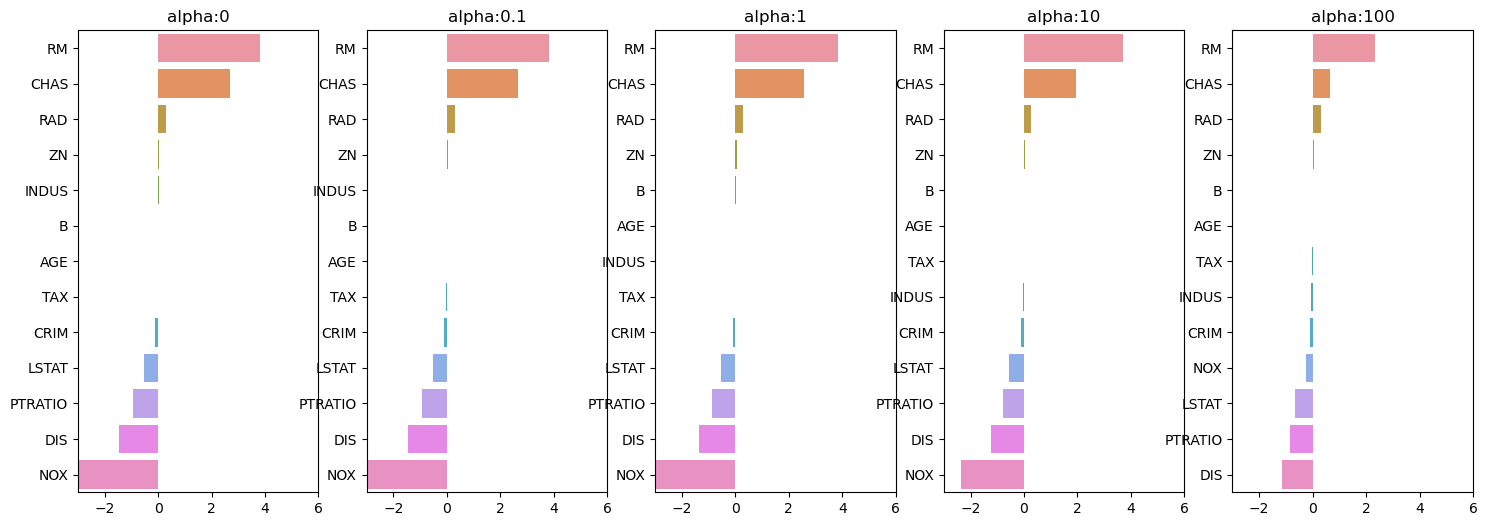

In [5]:
# alpha 값의 변화에 따른 피처의 회귀 계수 값을 가로 막대 그래프로 시각화하기
# 각 alpha 값에 따른 회귀 계수 값을 시각화 하기 위해 5개의 열로 된 맷플롯립 축 생성
fig,ax=plt.subplots(figsize=(18,6),nrows=1,ncols=5)
# 각 alpha 값에 따른 회귀 계수 값을 데이터로 저장하기 위한 dataframe 생성
coeff_df=pd.DataFrame()
# alpha 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장, pos는 axis 위치 지정
for pos,alpha in enumerate(alphas):
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_data,y_target)
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 dataframe 칼럼으로 추가
    coeff=pd.Series(data=ridge.coef_,index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname]=coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화, 회귀 계수값이 높은 순으로 표현
    coeff=coeff.sort_values(ascending=False)
    ax[pos].set_title(colname)
    ax[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values,y=coeff.index,ax=ax[pos])
# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 dataframe으로 표시
plt.show()

In [6]:
# dataframe에 저장된 alpha 값의 변화에 따른 릿지 회귀 계수 값 구하기
ridge_alphas=[0,0.1,1,10,100]
sort_column='alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column,ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


## Lasso 회귀

- L2 규제가 회귀 계수의 크기를 감소시키는데 반해 L1 규제는 적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 가지고 있음

In [18]:
from sklearn.linear_model import Lasso,ElasticNet

# 각 alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 구하고 회귀 계수값을 df로 변환
def get_linear_reg_eval(model_name,params:None,X_data_n=None,y_target_n=None,verbose=None):
    coeff_df=pd.DataFrame()
    if verbose : print('###',model_name,'###')
    for param in params:
        if model_name=='Ridge': model=Ridge(alpha=param)
        elif model_name=='Lasso': model=Lasso(alpha=param)
        elif model_name=='ElasticNet':model=ElasticNet(alpha=param,l1_ratio=0.7)
        neg_mse_scores=cross_val_score(model,X_data_n,y_target_n,scoring='neg_mean_squared_error',cv=5)
        avg_rmse=np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE:{1:.3f}'.format(param,avg_rmse))
        # cross_val_score는 evalutation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data,y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 dataframe의 column으로 추가
        coeff=pd.Series(data=model.coef_,index=X_data.columns)
        colname='alpha'+str(param)
        coeff_df[colname]=coeff
    return coeff_df

In [19]:
# 사용할 alpha 파라미터 값을 정의하고 get_linear_reg_eval 함수 추출
lasso_alphas=[0.07,0.1,0.5,1,3]
coeff_lasso_df=get_linear_reg_eval('Lasso',params=lasso_alphas,X_data_n=X_data,y_target_n=y_target)

alpha 0.07일 때 5 폴드 세트의 평균 RMSE:5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE:5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE:5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE:5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE:6.189


In [20]:
# 반환된 coeff_lasso_df를 첫번째 column순으로 내립차순 정렬해 회귀계수 dataframe 출력
sort_column='alpha'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column,ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


## ElasticNet 회귀

- L2규제를 Lasso회귀에 추가한 것
- Ridge와 Lasso와 달리 alpha=a(L1 규제의 alpha값)+b(L2 규제의 alpha값)


In [21]:
# ElasticNet에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas=[0.07,0.1,0.5,1,3]
coeff_elastic_df=get_linear_reg_eval('ElasticNet',params=elastic_alphas,X_data_n=X_data,
                                     y_target_n=y_target)

alpha 0.07일 때 5 폴드 세트의 평균 RMSE:5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE:5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE:5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE:5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE:6.068


In [22]:
# 반환된 coeff_elastic_df를 첫번째 column순으로 내림차순 정렬해 회귀계수 dataframe 출력
sort_column='alpha'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column,ascending=False)

,alpha0.07,alpha0.1,alpha0.5,alpha1,alpha3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


## 선형 회귀 모델을 위한 데이터 변환

In [31]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures

In [29]:
# method는 Standard, MinMax, Log 변환 결정
# p_degree는 다항식 특성을 추가할 때 적용, p_degree는 2이상 부여하지 않음
def get_scaled_data(method='None',p_degree=None,input_data=None):
    if method=='Standard':
        scaled_data=StandardScaler().fit_transform(input_data)
    elif method=='MinMax':
        scaled_data=MinMaxScaler().fit_transform(input_data)
    elif method=='Log':
        scaled_data=np.log1p(input_data)
    else:
        scaled_data=input_data
    if p_degree!=None:
        scaled_data=PolynomialFeatures(degree=p_degree,include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [32]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas=[0.1,1,10,100]
# 5개 방식으로 변환, 먼저 원본 그대로, 표준정규 분포, 표준정규 분포+다항식 특성
scale_methods=[(None,None),('Standard',None),('Standard',2),('MinMax',None),
              ('MinMax',2),('Log',None)]
for scale_method in scale_methods:
    X_data_scaled=get_scaled_data(method=scale_method[0],p_degree=scale_method[1],
                                 input_data=X_data)
    print('## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0],scale_method[1]))
    get_linear_reg_eval('Ridge',params=alphas,X_data_n=X_data_scaled,y_target_n=y_target,verbose=False)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE:5.788
alpha 1일 때 5 폴드 세트의 평균 RMSE:5.653
alpha 10일 때 5 폴드 세트의 평균 RMSE:5.518
alpha 100일 때 5 폴드 세트의 평균 RMSE:5.330
## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE:5.826
alpha 1일 때 5 폴드 세트의 평균 RMSE:5.803
alpha 10일 때 5 폴드 세트의 평균 RMSE:5.637
alpha 100일 때 5 폴드 세트의 평균 RMSE:5.421
## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE:8.827
alpha 1일 때 5 폴드 세트의 평균 RMSE:6.871
alpha 10일 때 5 폴드 세트의 평균 RMSE:5.485
alpha 100일 때 5 폴드 세트의 평균 RMSE:4.634
## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE:5.764
alpha 1일 때 5 폴드 세트의 평균 RMSE:5.465
alpha 10일 때 5 폴드 세트의 평균 RMSE:5.754
alpha 100일 때 5 폴드 세트의 평균 RMSE:7.635
## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE:5.298
alpha 1일 때 5 폴드 세트의 평균 RMSE:4.323
alpha 10일 때 5 폴드 세트의 평균 RMSE:5.185
alpha 100일 때 5 폴드 세트의 평균 RMSE:6.538
## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE:4.770
alpha 1일 때 5 폴드 세트의 평균 RMS

## 로지스틱 회귀

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer=load_breast_cancer()

from sklearn.model_selection import train_test_split
# StandardScaler()로 평균이 0,분산이 1 로 데이터 분포도 변환
scaler=StandardScaler()
data_scaled=scaler.fit_transform(cancer.data)
X_train,X_test,y_train,y_test=train_test_split(data_scaled,cancer.target,test_size=0.3,random_state=0)

from sklearn.metrics import accuracy_score,roc_auc_score
# 로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)
lr_preds=lr_clf.predict(X_test)
# 정확도와 roc_auc 측정
print('accuracy {0:.3f}'.format(accuracy_score(y_test,lr_preds)))
print('roc_auc {0:.3f}'.format(roc_auc_score(y_test,lr_preds)))

accuracy 0.977
roc_auc 0.972


In [36]:
from sklearn.model_selection import GridSearchCV
params={'penalty':['l2','l1'],'C':[0.01,0.1,1,1,5,10]}
grid_clf=GridSearchCV(lr_clf,param_grid=params,scoring='accuracy',cv=3)
grid_clf.fit(data_scaled,cancer.target)
print('최적 하이퍼 파라미터:{0},최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l2'},최적 평균 정확도:0.975


C:\Users\MYCOM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MYCOM\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MYCOM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\MYCOM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

In [ ]:
# 회귀 트리


In [38]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
boston=load_boston()
bostonDF=pd.DataFrame(boston.data,columns=boston.feature_names)
bostonDF['Price']=boston.target
y_target=bostonDF['Price']
X_data=bostonDF.drop(['Price'],axis=1,inplace=False)
rf=RandomForestRegressor(random_state=0,n_estimators=1000)
neg_mse_scores=cross_val_score(rf,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

C:\Users\MYCOM\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [40]:
print('5 교차 검증 개별 Negative MSE scores',np.round(neg_mse_scores,2))
print('5 교차 검증 개별 RMSE scores',np.round(rmse_scores,2))
print('5 교차 검증 평균 RMSE',np.round(avg_rmse,3))

5 교차 검증 개별 Negative MSE scores [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증 개별 RMSE scores [2.81 3.63 4.54 6.8  4.34]
5 교차 검증 평균 RMSE 4.423


In [43]:
def get_model_cv_prediction(model,X_data,y_target):
    neg_mse_scores=cross_val_score(model,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
    rmse_scores=np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse_scores)
    print('###',model.__class__.__name__,'###')
    print('5 교차 검증의 평균 RMSE',np.round(avg_rmse,3))
    
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg=DecisionTreeRegressor(random_state=0,max_depth=4)
rf_reg=RandomForestRegressor(random_state=0,n_estimators=1000)
gb_reg=GradientBoostingRegressor(random_state=0,n_estimators=1000)
xgb_reg=XGBRegressor(n_estimators=1000)
lgb_reg=LGBMRegressor(n_estimators=1000)

models=[dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]
for model in models:
    get_model_cv_prediction(model,X_data,y_target)

### DecisionTreeRegressor ###
5 교차 검증의 평균 RMSE 5.978
### RandomForestRegressor ###
5 교차 검증의 평균 RMSE 4.423
### GradientBoostingRegressor ###
5 교차 검증의 평균 RMSE 4.269
### XGBRegressor ###
5 교차 검증의 평균 RMSE 4.251
### LGBMRegressor ###
5 교차 검증의 평균 RMSE 4.646


<AxesSubplot:>

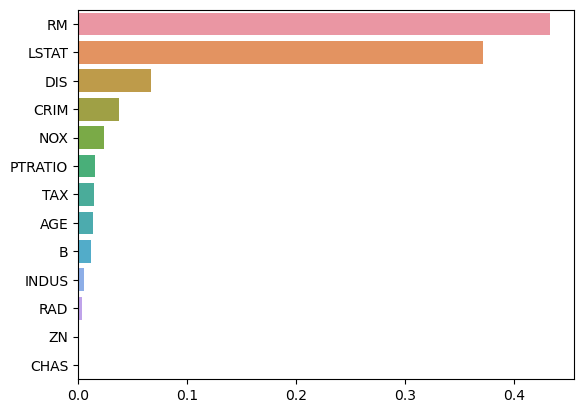

In [45]:
import seaborn as sns
%matplotlib inline
rf_reg=RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_data,y_target)

feature_series=pd.Series(data=rf_reg.feature_importances_,index=X_data.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)

(100, 2)


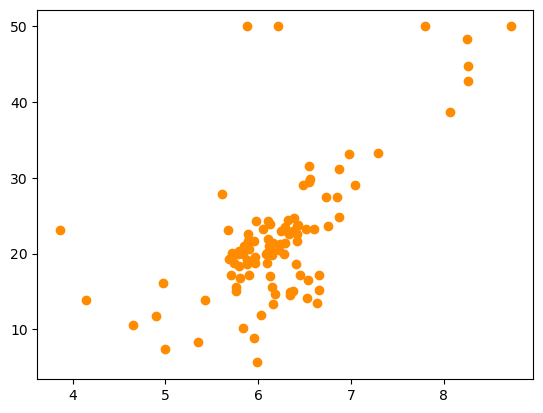

In [46]:
# 회귀 트리 Regressor 어떻게 예측값 판단하는지 시각화

bostonDF_sample=bostonDF[['RM','Price']]
bostonDF_sample=bostonDF_sample.sample(n=100,random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM,bostonDF_sample.Price,c='darkorange')

In [47]:
bostonDF_sample

,RM,Price
329,6.333,22.6
371,6.216,50.0
219,6.373,23.0
403,5.349,8.3
78,6.232,21.2
...,...,...
246,6.108,24.3
374,4.138,13.8
56,6.383,24.7
455,6.525,14.1


In [48]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr_reg=LinearRegression()
rf_reg2=DecisionTreeRegressor(max_depth=2)
rf_reg7=DecisionTreeRegressor(max_depth=7)
X_test=np.arange(4.5,8.5,0.04).reshape(-1,1)
X_feature=bostonDF_sample['RM'].values.reshape(-1,1)
y_target=bostonDF_sample['Price'].values.reshape(-1,1)

lr_reg.fit(X_feature,y_target)
rf_reg2.fit(X_feature,y_target)
rf_reg7.fit(X_feature,y_target)

pred_lr=lr_reg.predict(X_test)
pred_rf2=rf_reg2.predict(X_test)
pred_rf7=rf_reg7.predict(X_test)

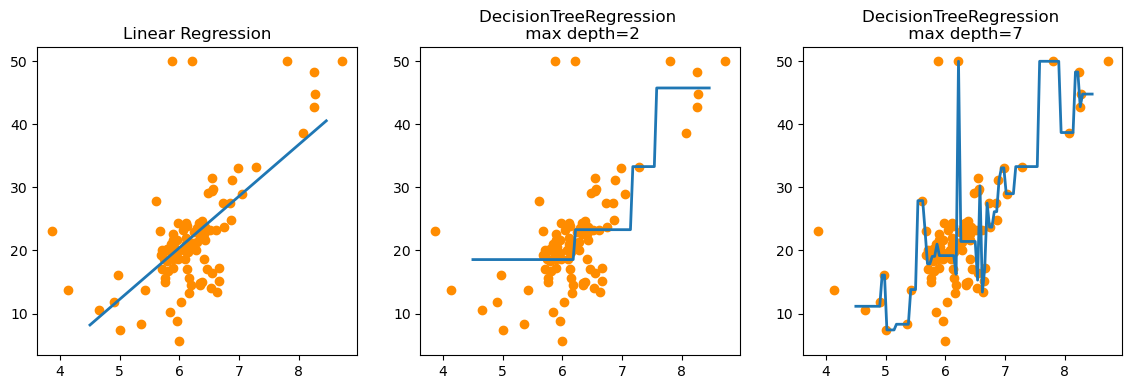

In [50]:
# 회귀선 그리기
fig,(ax1,ax2,ax3)=plt.subplots(figsize=(14,4),ncols=3)
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM,bostonDF_sample.Price,c='darkorange')
ax1.plot(X_test,pred_lr,label='Linear',linewidth=2)


ax2.set_title('DecisionTreeRegression \n max depth=2')
ax2.scatter(bostonDF_sample.RM,bostonDF_sample.Price,c='darkorange')
ax2.plot(X_test,pred_rf2,label='max depth=2',linewidth=2)

ax3.set_title('DecisionTreeRegression \n max depth=7')
ax3.scatter(bostonDF_sample.RM,bostonDF_sample.Price,c='darkorange')
ax3.plot(X_test,pred_rf7,label='max depth=7',linewidth=2)